In [1]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, GeometryCollection
from shapely.geometry.base import BaseGeometry
from new_helpers_may_14 import PopEstimator

In [2]:
# Create an invalid polygon (self-intersecting)
invalid_poly = Polygon([(3, 3), (4, 4), (4, 3), (3, 4), (3, 3)])

# Create an empty geometry
empty_geom = BaseGeometry()

# Create a geometry collection far from the other geometries
geom_collection = GeometryCollection([Point(20, 20), LineString([(21, 21), (22, 22)])])


# Create the test GeoDataFrame
test_gdf = gpd.GeoDataFrame({
    "ID_hazard": [1, 2, 3, 4, 5],
    "buffer_dist": [10, 20, 30, 40, 50],
    "geometry": [
        Point(0, 0),                        # Point
        LineString([(1.5, 1.5), (2.5, 2.5)]),       # Line
        Polygon([(7, 5), (8, 6), (8, 5)]),  # Polygon
        empty_geom,                         # Empty geometry
        invalid_poly                        # Invalid geometry
    ]
}, crs="EPSG:4326")

# Update the test GeoDataFrame to include the geometry collection
test_gdf = gpd.GeoDataFrame({
    "ID_hazard": [1, 2, 3, 4, 5, 6],
    "buffer_dist": [10, 20, 30, 40, 50, 60],
    "geometry": [
        Point(0, 0),                              # Point
        LineString([(1.5, 1.5), (2.5, 2.5)]),     # LineString
        Polygon([(7, 5), (8, 6), (8, 5)]),        # Polygon
        empty_geom,                               # Empty geometry
        invalid_poly,                             # Invalid geometry
        geom_collection                           # GeometryCollection (no overlap)
    ]
}, crs="EPSG:4326")


/var/folders/8y/9yw138b95kjd5wjs3my5vy900000gn/T/ipykernel_41852/1762275085.py:5: ShapelyDeprecationWarning: Directly calling the base class 'BaseGeometry()' is deprecated, and will raise an error in the future. To create an empty geometry, use one of the subclasses instead, for example 'GeometryCollection()'.
  empty_geom = BaseGeometry()


In [3]:
# write hazards to the demo_data folder as parquet
test_gdf.to_parquet("demo/demo_data/hazards.parquet", index=False)



<Axes: >

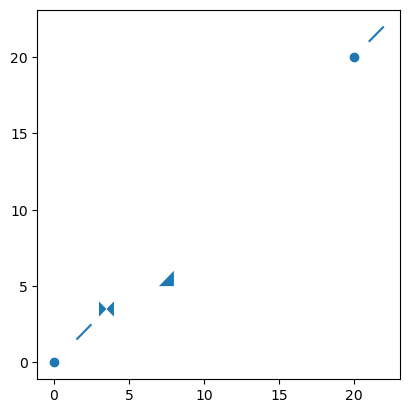

In [4]:
test_gdf.plot()

In [ ]:
# init the class
est = PopEstimator()

hazard_df = est.prepare_data("demo/demo_data/hazards.parquet", "hazard")
est.hazard_data


/Volumes/squirrel-utopia/Pop_Exp/new_helpers_may_14.py:216: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_df["centroid_lon"] = shp_df.centroid.x
/Volumes/squirrel-utopia/Pop_Exp/new_helpers_may_14.py:217: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_df["centroid_lat"] = shp_df.centroid.y


Reading data and finding best UTM projection for hazard geometries


Buffering hazard geometries: 100%|██████████| 5/5 [00:00<00:00, 91.81it/s]


In [6]:
hazard_df.head()

,ID_hazard,buffer_dist,geometry,utm_projection,buffered_hazard
0,1,10,POINT (0 0),EPSG:32631,"POLYGON ((8.974348824231427e-5 0, 8.9311348763..."
1,2,20,"LINESTRING (1.5 1.5, 2.5 2.5)",EPSG:32631,POLYGON ((2.499873206419677 2.5001283556621687...
2,3,30,"POLYGON ((7 5, 8 6, 8 5, 7 5))",EPSG:32632,POLYGON ((7.0000002058480835 4.999728766539616...
4,5,50,"MULTIPOLYGON (((3 4, 3.5 3.5, 3 3, 3 4)), ((4 ...",EPSG:32631,POLYGON ((2.9995495727233443 3.999999999875969...
5,6,60,"GEOMETRYCOLLECTION (POINT (20 20), LINESTRING ...",EPSG:32634,MULTIPOLYGON (((21.999576958338036 22.00037165...


<Axes: >

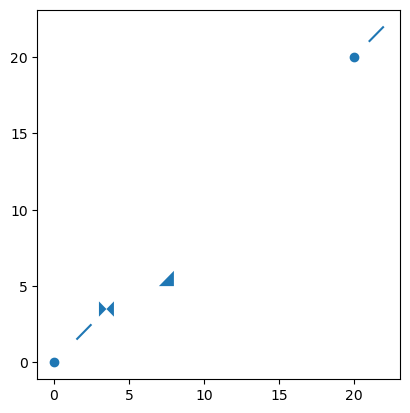

In [7]:
hazard_df.plot()

In [8]:
result_2 = est.estimate_exposed_pop(
    pop_path="demo/demo_data/01_raw_data/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R5_C8.tif",
    hazard_specific=True,
    hazards=hazard_df
)

Finding exposed population


/opt/homebrew/Caskroom/miniforge/base/envs/wf/lib/python3.12/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [9]:
print(result_2)

   ID_hazard  exposed
0          1      0.0
1          2      0.0
2          3      0.0
4          5      0.0
5          6      0.0


In [ ]:
result = est.estimate_exposed_pop(
    pop_path="demo/demo_data/01_raw_data/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R5_C8.tif",
    hazard_specific=False,
    hazards=hazard_df
)



Finding exposed population
Finding exposed population


UnboundLocalError: cannot access local variable 'exposed' where it is not associated with a value

In [47]:
print(result)

      ID_hazard  exposed
0  merged_geoms      0.0
